🔁 Scoring at 07:59:28
✅ Latest scoring complete. Saved to: scored/bchusdt_scored_latest.parquet


,open_time,close,rsi_14_backward,sma_ratio_14,bb_width_14,bb_width_140,roc_14,roc_140,predicted_proba_spike,predicted_flag
119,2025-10-20 07:59:00,480.3,62.872167,1.000938,0.298485,1.303143,0.250470,1.887993,0.074643,0
118,2025-10-20 07:58:00,480.1,60.556905,1.000700,0.319207,1.372863,0.187813,1.932059,0.075759,0
117,2025-10-20 07:57:00,479.8,56.805106,1.000208,0.330550,1.448135,0.208855,1.868365,0.075765,0
116,2025-10-20 07:56:00,479.8,56.805106,1.000357,0.381434,1.519911,0.208855,1.846742,0.078719,0
115,2025-10-20 07:55:00,479.9,58.401734,1.000715,0.417902,1.584629,0.229741,1.954536,0.081645,0


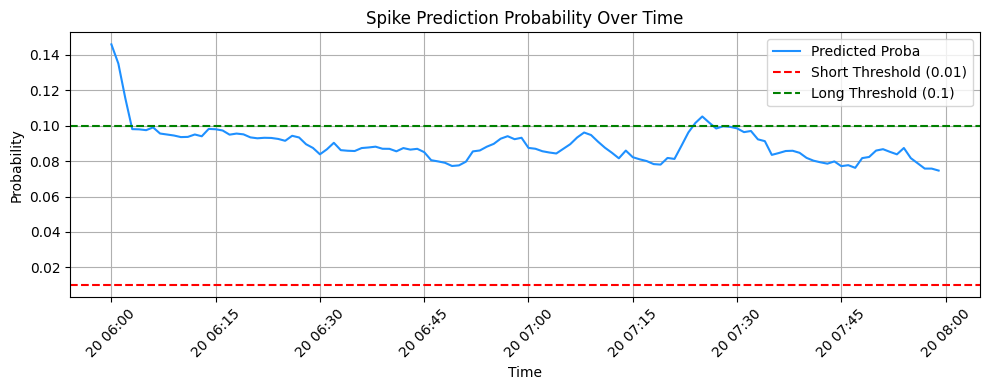

KeyboardInterrupt: 

In [5]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import production.scoring_runner as sr
import importlib
importlib.reload(sr)

while True:
    clear_output(wait=True)
    print("🔁 Scoring at", time.strftime("%H:%M:%S"))

    df_latest = sr.run_scoring()
    if df_latest is not None:
        # 📊 Tábla megjelenítése
        display(df_latest.tail(5).sort_values(by="open_time", ascending=False))

        # 📈 Predicted proba line plot
        plt.figure(figsize=(10, 4))
        plt.plot(df_latest['open_time'], df_latest['predicted_proba_spike'], label='Predicted Proba', color='dodgerblue')
        plt.axhline(y=0.01, color='red', linestyle='--', linewidth=1.5, label='Short Threshold (0.01)')
        plt.axhline(y=0.1, color='green', linestyle='--', linewidth=1.5, label='Long Threshold (0.1)')
        plt.title("Spike Prediction Probability Over Time")
        plt.xlabel("Time")
        plt.ylabel("Probability")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    time.sleep(5)  # vagy time.sleep(5) ha gyakrabban kéred
